In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
def f(x, y):
    return y / (2 * np.sqrt(x))


def exact_solution(x):
    return 2 / math.e * np.exp(np.sqrt(x))

In [7]:
a = 1
b = 0
y0 = 2
N_values = [10, 20, 30]
markers = ["v", "o", "P"]

In [8]:
def euler_method(a, b, y0, N):
    h = (b - a) / N
    x_values = np.linspace(a, b, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = y0

    for i in range(N):
        y_values[i + 1] = y_values[i] + h * f(x_values[i], y_values[i])

    return x_values, y_values

In [9]:
def cochi_method(a, b, y0, N):
    h = (b - a) / N
    x_values = np.linspace(a, b, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = y0

    for i in range(N):
        k1 = f(x_values[i], y_values[i])
        k2 = f(x_values[i] + h / 2, y_values[i] + h / 2 * k1)
        y_values[i + 1] = y_values[i] + h * k2

    return x_values, y_values

In [10]:
def taylor_third_order(a, b, y0, N):
    h = (b - a) / N
    x_values = np.linspace(a, b, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = y0

    for i in range(N):
        xi = x_values[i]
        yi = y_values[i]
        f1 = f(xi, yi)
        f2 = (1 / 2) * f1 * h
        f3 = (1 / 6) * (f(xi + h, yi + h * f1) - f1) * h ** 2
        y_values[i + 1] = yi + h * (f1 + f2 + f3)

    return x_values, y_values


In [11]:
def adams_third_order_implicit_with_euler(a, b, y0, N):
    h = (b - a) / N
    x_values = np.linspace(a, b + 1e-10, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = y0

    x1 = x_values[1]
    y1 = taylor_third_order(a, x1, y0, 1)[1][1]
    x2 = x_values[2]
    y2 = taylor_third_order(a, x2, y0, 2)[1][2]
    y_values[1] = y1
    y_values[2] = y2

    for i in range(2, N):
        y_values[i + 1] = (y_values[i] + (h / 12) * (
                8 * f(x_values[i], y_values[i]) - f(x_values[i - 1], y_values[i - 1]))) / (
                                  1 - (5 * h) / (24 * np.sqrt(x_values[i + 1])))

    return x_values, y_values

In [12]:
def plot_solution(x_values, y_values, method_name, marker):
    plt.plot(x_values, y_values, label=method_name, marker=marker)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)


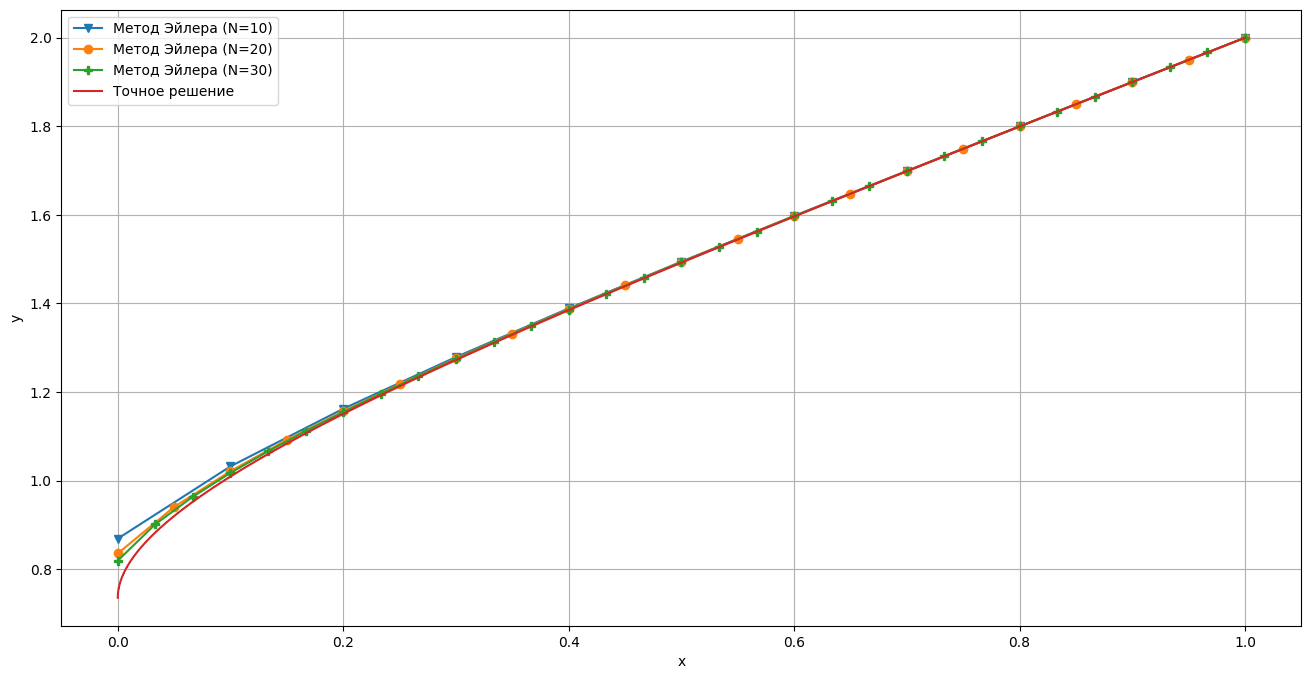

In [13]:
plt.figure(figsize=(16, 8))
for N, marker in zip(N_values, markers):
    x_values, y_values = euler_method(a, b, y0, N)
    plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker=marker)

x_exact = np.linspace(1, 0, 10000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

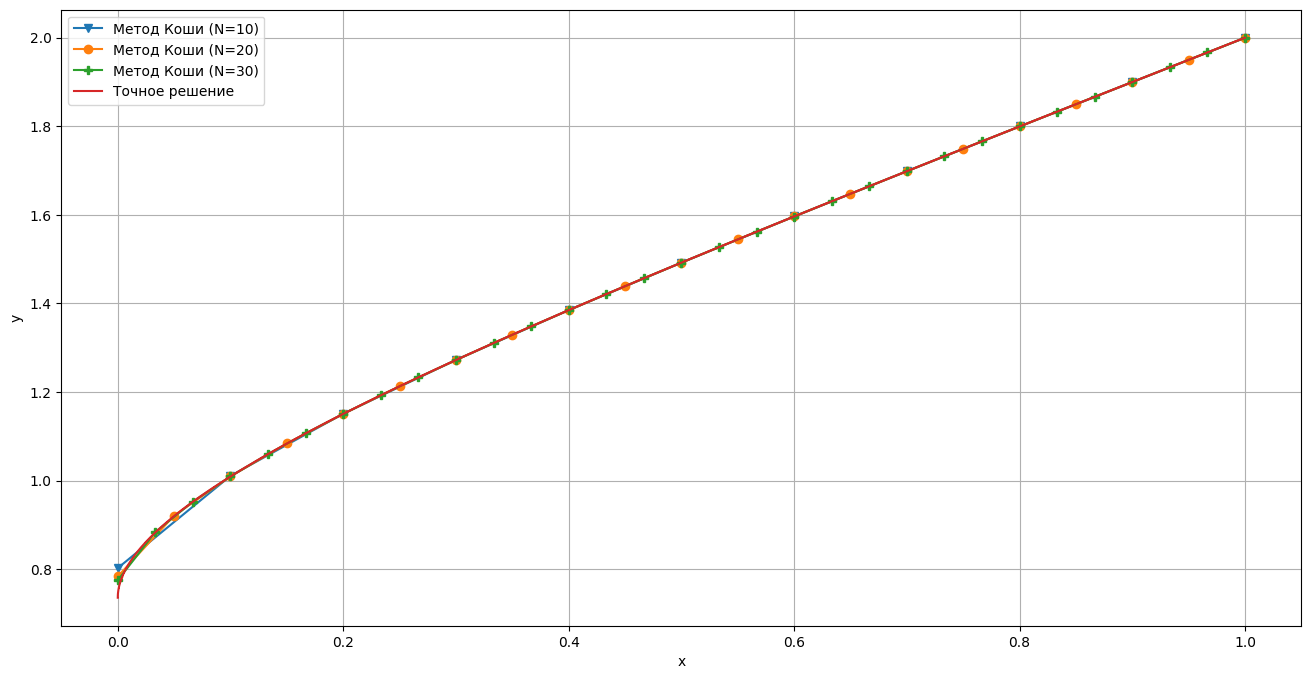

In [14]:
plt.figure(figsize=(16, 8))
for N, marker in zip(N_values, markers):
    x_values, y_values = cochi_method(a, b, y0, N)
    plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker=marker)

x_exact = np.linspace(1, 0, 10000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

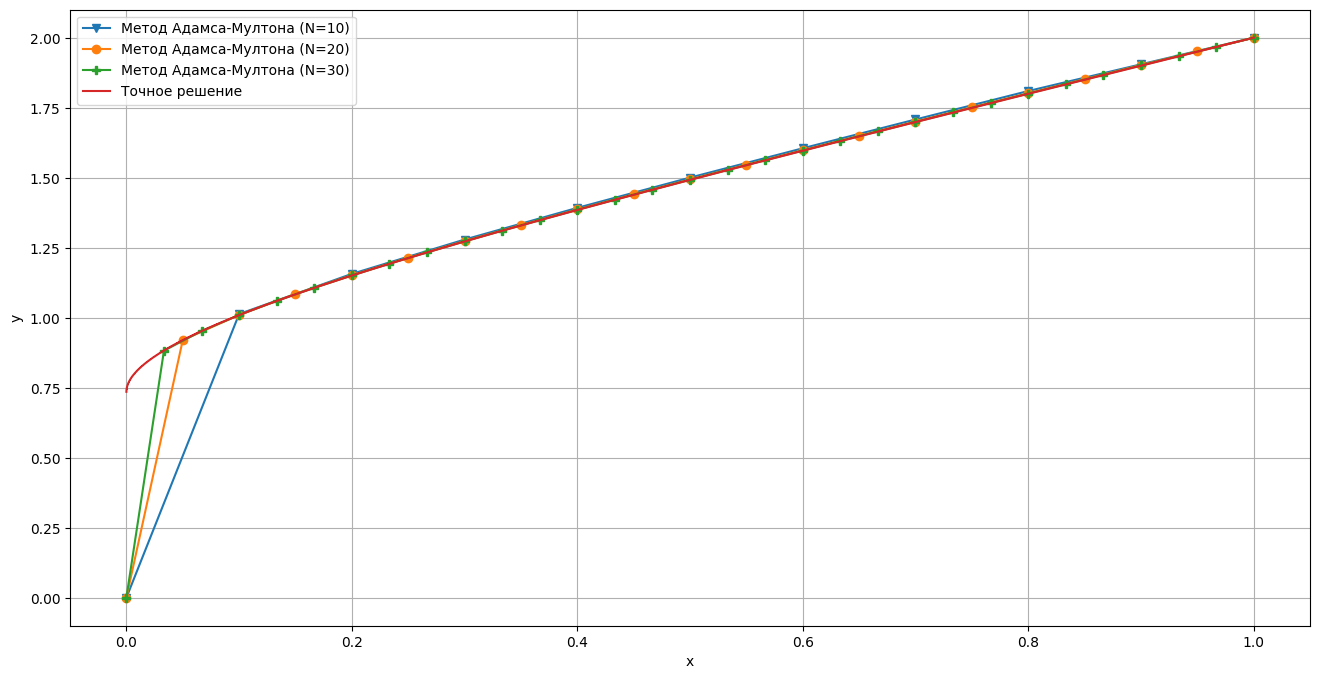

In [15]:
plt.figure(figsize=(16, 8))
for N, marker in zip(N_values, markers):
    x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
    plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker=marker)

x_exact = np.linspace(1, 0, 10000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

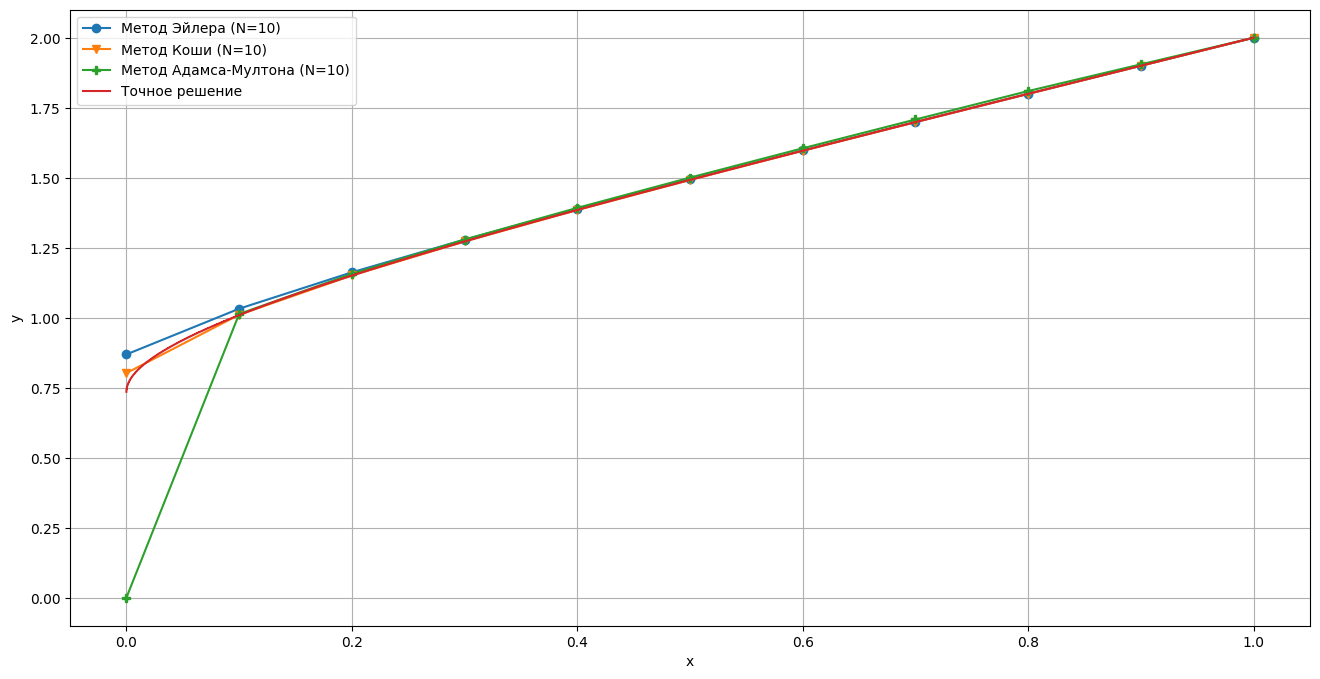

In [16]:
plt.figure(figsize=(16, 8))
N = 10
x_values, y_values = euler_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker="o")
x_values, y_values = cochi_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker="v")
x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker="P")

x_exact = np.linspace(1, 0, 100000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

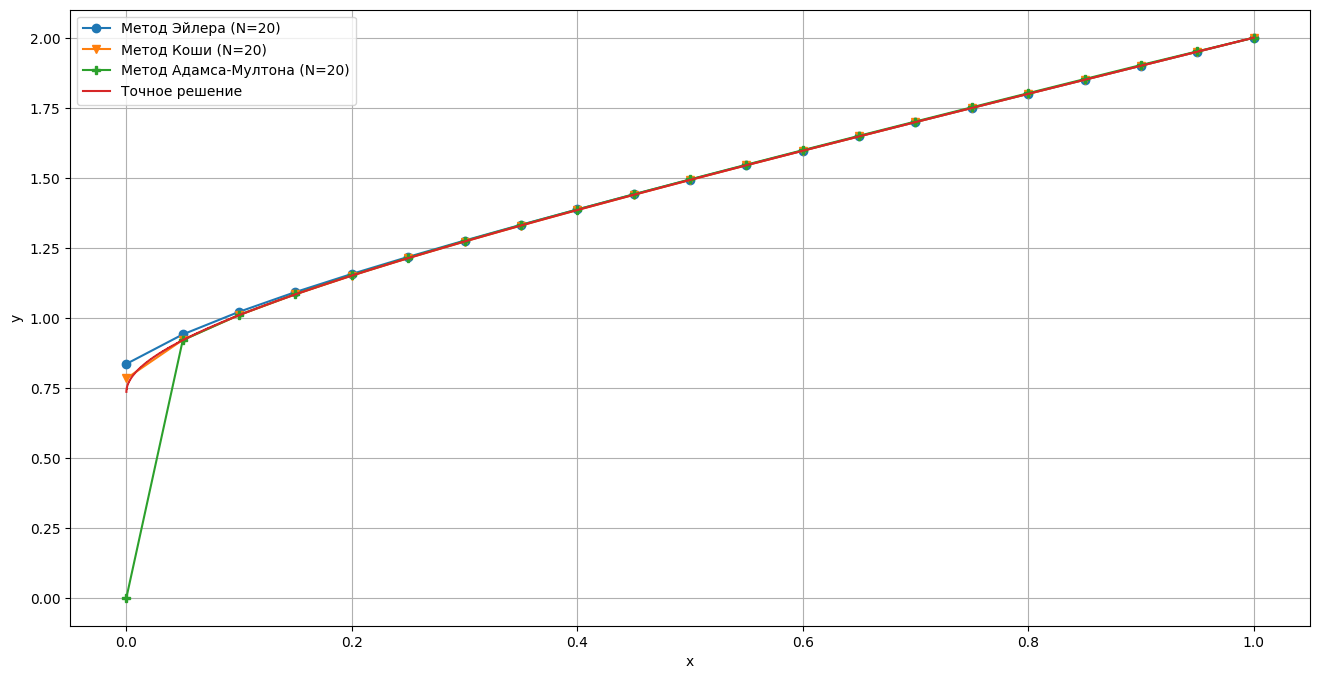

In [17]:
plt.figure(figsize=(16, 8))
N = 20
x_values, y_values = euler_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker="o")
x_values, y_values = cochi_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker="v")
x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker="P")

x_exact = np.linspace(1, 0, 100000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

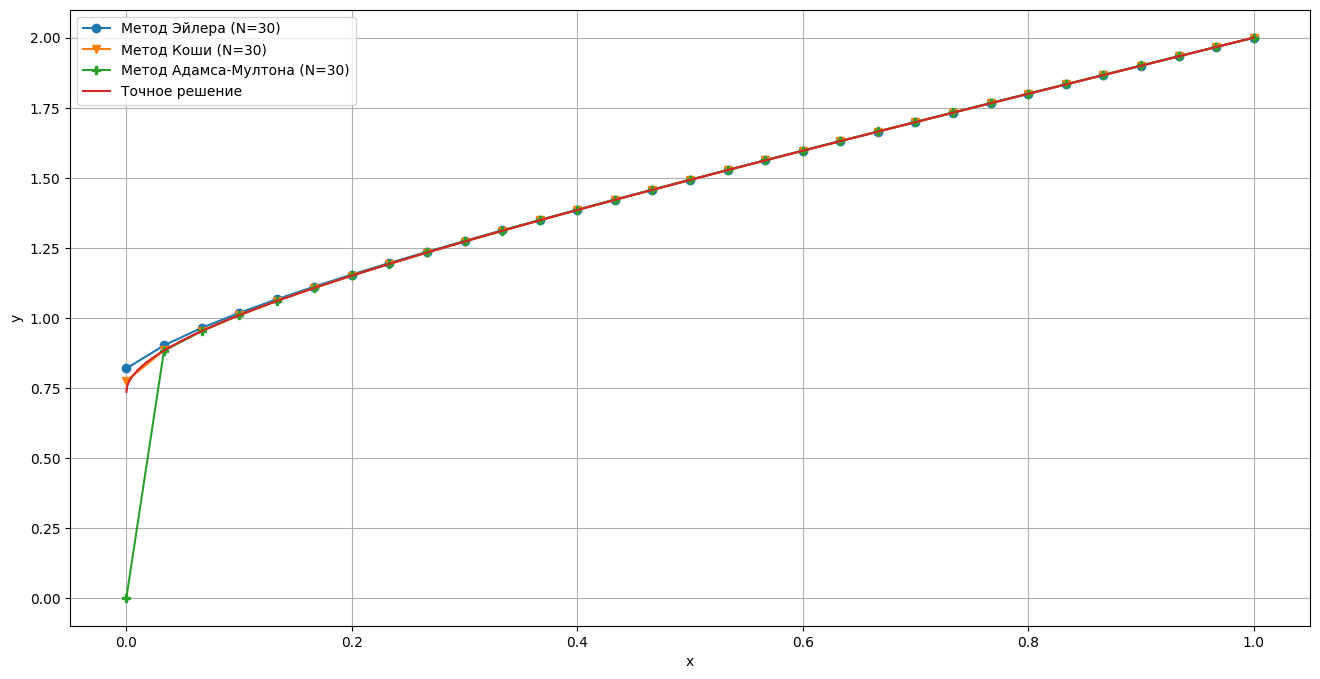

In [18]:
plt.figure(figsize=(16, 8))
N = 30
x_values, y_values = euler_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker="o")
x_values, y_values = cochi_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker="v")
x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker="P")

x_exact = np.linspace(1, 0, 100000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()

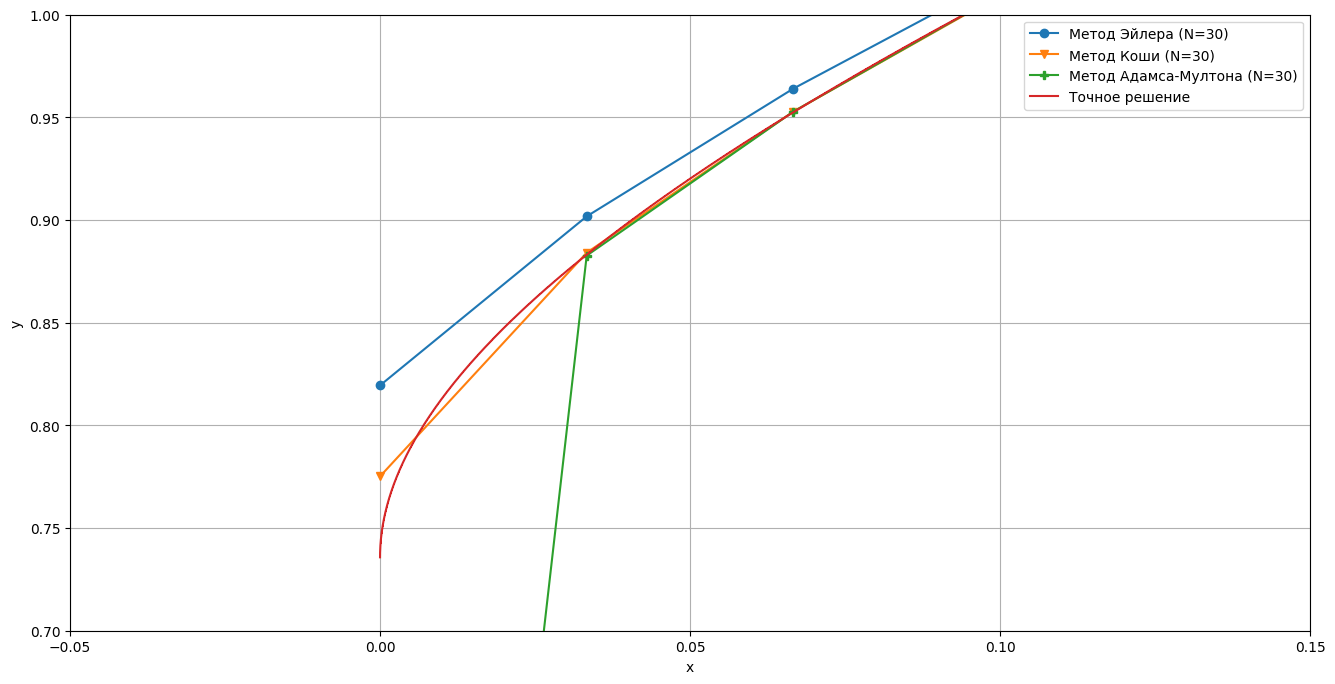

In [19]:
plt.figure(figsize=(16, 8))
N = 30
x_values, y_values = euler_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker="o")
x_values, y_values = cochi_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker="v")
x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker="P")

x_exact = np.linspace(1, 0, 100000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")


plt.xlim([-0.05, 0.1])
plt.ylim([0.70, 1])
plt.xticks(np.arange(-0.05, 0.2, 0.05))
plt.yticks(np.arange(0.70, 1, 0.05))

plt.show()

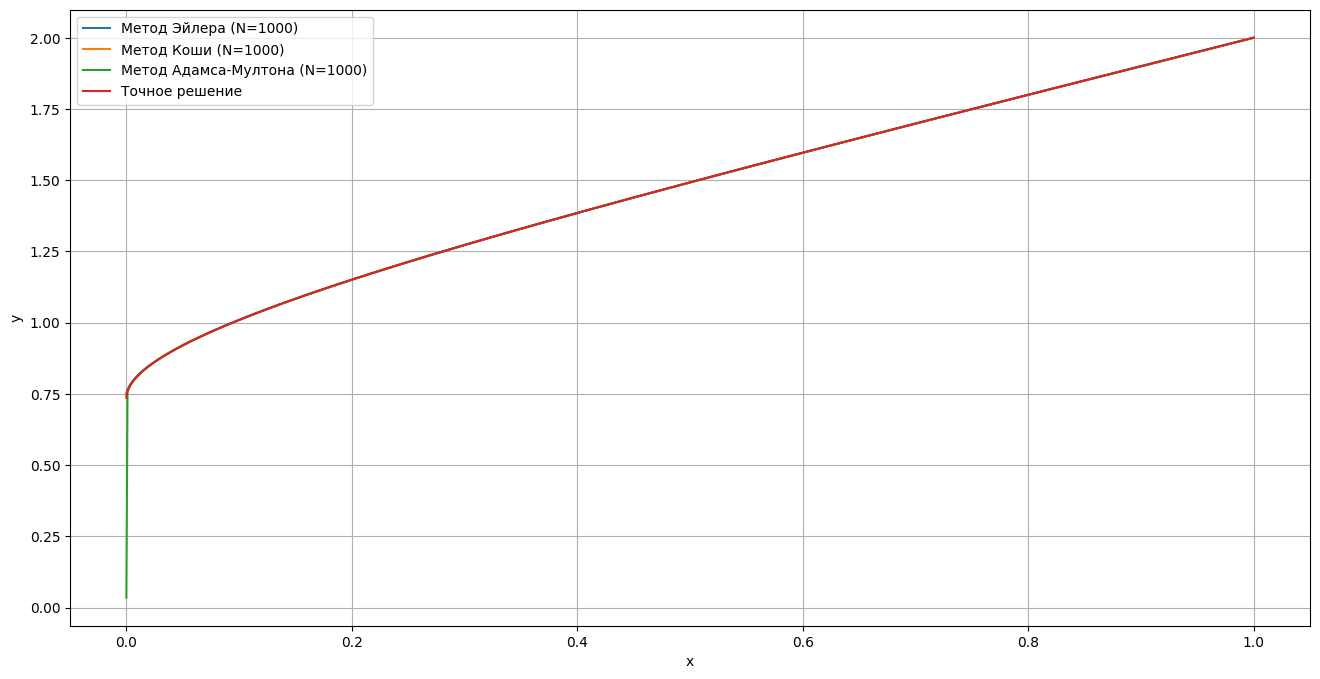

In [20]:
plt.figure(figsize=(16, 8))
N = 1000
x_values, y_values = euler_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Эйлера (N={N})", marker=",")
x_values, y_values = cochi_method(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Коши (N={N})", marker=",")
x_values, y_values = adams_third_order_implicit_with_euler(a, b, y0, N)
plot_solution(x_values, y_values, f"Метод Адамса-Мултона (N={N})", marker=",")

x_exact = np.linspace(1, 0, 100000)
y_exact = exact_solution(x_exact)
plot_solution(x_exact, y_exact, "Точное решение", marker=",")

plt.show()